# ppsa -- python power system analysis 测试和说明

## 实验1

下面一段代码块可以依据输入的网络结构自动生成节点导纳矩阵

In [1]:
import numpy as np
import scipy as sp
import ppsa as psa

grid = psa.power_grid(node_num= 5, Sb= 120)
grid.add_generator(loc=(1,0),Sn=120 ,Xd_2= 0.23)
grid.add_generator(loc=(2,0),Sn=60 ,Xd_2= 0.14)
grid.add_transformer(loc=(1,3),Sn= 120, Vs= 0.105)
grid.add_transformer(loc=(2,4),Sn= 60, Vs= 0.105)
grid.add_line(loc=(3,4),voltage=115, x= 0.4, b= 2.8, length= 120)
grid.add_line(loc=(3,5),voltage=115, x= 0.4, b= 2.8, length= 80)
grid.add_line(loc=(4,5),voltage=115, x= 0.4, b= 2.8, length= 70)
print('初始导纳矩阵：\n',grid.admat)
print('5结点短路的矩阵：\n',grid.admat[:-1,:-1])
grid.add_line(loc=(4,5),voltage=115, x= 0.4, b= 2.8, length= -70)
grid.add_line(loc=(0,5),voltage=115, x= 0.4, b= 2.8, length= 35)
grid.add_line(loc=(4,0),voltage=115, x= 0.4, b= 2.8, length= 35)
print('L-3中点短路的矩阵：\n',grid.admat)

初始导纳矩阵：
 [[4.34782609 -9.52380952j 0.         +0.j         0.         +9.52380952j
  0.         +0.j         0.         +0.j        ]
 [0.         +0.j         3.57142857 -4.76190476j 0.         +0.j
  0.         +4.76190476j 0.         +0.j        ]
 [0.         +9.52380952j 0.         +0.j         0.        -15.23296855j
  0.         +2.29600694j 0.         +3.44401042j]
 [0.         +0.j         0.         +4.76190476j 0.         +2.29600694j
  0.        -10.96460819j 0.         +3.9360119j ]
 [0.         +0.j         0.         +0.j         0.         +3.44401042j
  0.         +3.9360119j  0.         -7.35687857j]]
5结点短路的矩阵：
 [[4.34782609 -9.52380952j 0.         +0.j         0.         +9.52380952j
  0.         +0.j        ]
 [0.         +0.j         3.57142857 -4.76190476j 0.         +0.j
  0.         +4.76190476j]
 [0.         +9.52380952j 0.         +0.j         0.        -15.23296855j
  0.         +2.29600694j]
 [0.         +0.j         0.         +4.76190476j 0.         +2.296

下面分别介绍下每行代码的作用

这3行代码不用理解，只是为程序运行做准备

In [2]:
import numpy as np
import scipy as sp
import ppsa as psa

下面这行表示创建一个名为*grid*的网络，grid可以置换成其他，只是一个名字，节点数*node_num = 5*，即5结点，网络统一标幺容量*Sb = 120 MVA*

In [3]:
grid = psa.power_grid(node_num= 5, Sb= 120)

下面代码表示向grid里面添加发电机(*generator*)，*loc = (1,0)*指1结点和地结点之间，*Sn = 120 MVA*是机组容量, *Xd_2 = 0.23*是次暂态电抗
* 注意*loc = (1,0)* 不要写成*loc = (0,1)* ，因为发电机是有正方向的，这里约定loc参数的第一个元素为电源正极

In [4]:
grid.add_generator(loc=(1,0),Sn=120 ,Xd_2= 0.23)
grid.add_generator(loc=(2,0),Sn=60 ,Xd_2= 0.14)

下面代码表示向grid里面添加变压器(*transformer*)，*loc = (1,3)*指1结点和3结点之间，*Sn = 120 MVA*是变压器额定容量, *Vs = 0.105*即短路电压百分比

In [5]:
grid.add_transformer(loc=(1,3),Sn= 120, Vs= 0.105)
grid.add_transformer(loc=(2,4),Sn= 60, Vs= 0.105)

下面代码表示向grid里面添加线路(*line*)，*loc = (3,4)*指3结点和4结点之间，*voltage = 115*是基准电压等级, *x= 0.4, b= 2.8, length= 120*分别是线路的参数

In [6]:
grid.add_line(loc=(3,4),voltage=115, x= 0.4, b= 2.8, length= 120)
grid.add_line(loc=(3,5),voltage=115, x= 0.4, b= 2.8, length= 80)
grid.add_line(loc=(4,5),voltage=115, x= 0.4, b= 2.8, length= 70)

这样整个网络就形成了，用下面这行代码输出grid的导纳矩阵，其中 **grid.admat**  是取出grid的admat属性
* admat -- admittance matrix   即导纳矩阵

In [7]:
print('初始导纳矩阵：\n',grid.admat)

初始导纳矩阵：
 [[4.34782609 -9.52380952j 0.         +0.j         0.         +9.52380952j
  0.         +0.j         0.         +0.j        ]
 [0.         +0.j         3.57142857 -4.76190476j 0.         +0.j
  0.         +4.76190476j 0.         +0.j        ]
 [0.         +9.52380952j 0.         +0.j         0.        -15.23296855j
  0.         +2.29600694j 0.         +3.44401042j]
 [0.         +0.j         0.         +4.76190476j 0.         +2.29600694j
  0.        -10.96460819j 0.         +3.9360119j ]
 [0.         +0.j         0.         +0.j         0.         +3.44401042j
  0.         +3.9360119j  0.         -7.35687857j]]


5结点接地，直接把最后一行一列抹掉就好了：

In [8]:
print('5结点短路的矩阵：\n',grid.admat[:-1,:-1])
#这里实际上并没有改变网络结构，只是把除5结点之外的有关元素输出了

5结点短路的矩阵：
 [[4.34782609 -9.52380952j 0.         +0.j         0.         +9.52380952j
  0.         +0.j        ]
 [0.         +0.j         3.57142857 -4.76190476j 0.         +0.j
  0.         +4.76190476j]
 [0.         +9.52380952j 0.         +0.j         0.        -15.23296855j
  0.         +2.29600694j]
 [0.         +0.j         0.         +4.76190476j 0.         +2.29600694j
  0.        -10.96460819j]]


In [9]:
grid.add_line(loc=(4,5),voltage=115, x= 0.4, b= 2.8, length= -70)

加入一根length为**-70**的线路，相当于切除它

然后重新在相关结点加入半段线路：

In [10]:
grid.add_line(loc=(0,5),voltage=115, x= 0.4, b= 2.8, length= 35)
grid.add_line(loc=(4,0),voltage=115, x= 0.4, b= 2.8, length= 35)
print('L-3中点短路的矩阵：\n',grid.admat)

L-3中点短路的矩阵：
 [[4.34782609 -9.52380952j 0.         +0.j         0.         +9.52380952j
  0.         +0.j         0.         +0.j        ]
 [0.         +0.j         3.57142857 -4.76190476j 0.         +0.j
  0.         +4.76190476j 0.         +0.j        ]
 [0.         +9.52380952j 0.         +0.j         0.        -15.23296855j
  0.         +2.29600694j 0.         +3.44401042j]
 [0.         +0.j         0.         +4.76190476j 0.         +2.29600694j
  0.        -14.90602031j 0.         +0.j        ]
 [0.         +0.j         0.         +0.j         0.         +3.44401042j
  0.         +0.j         0.        -11.29829068j]]


## 实验2
___
给出图示网络结构，作短路计算。

![net](simple_net.png)

In [11]:
grid2 = psa.power_grid(node_num= 4, Sb= 60)

grid2.add_generator((1,0), Sn=60, Xd_2=0.15, ref_vol = 1.05)
grid2.add_generator((4,0), Sn=150, Xd_2=0.2, ref_vol = 1.05)
grid2.add_transformer((1,2), Sn=60, Vs=0.12)
grid2.add_transformer((3,4), Sn=90, Vs=0.12)
grid2.add_line((2,3), voltage=115, x=0.4, length=80)
grid2.add_line((2,3), voltage=115, x=0.4, length=80)
grid2.add_load(loc=(3,0), Sn= 120, Xld_2= 0.35, ref_vol = 0.8)

In [12]:
#这里是短路后结点电压计算的实现
f = 3
U = grid2.nodes_voltage()
Uf = U.copy()
print('短路前各结点电压：\n',U)
Z = grid2.impedance_matrix()[f-1]
Uf = U - U[f-1]*Z/Z[f-1]
print('短路后各结点电压：\n',Uf)

短路前各结点电压：
 [1.00201296+0.01640282j 0.9888907 -0.02198682j 0.98095285-0.04520928j
 0.99287179+0.01191893j]
短路后各结点电压：
 [ 6.53546371e-01+5.09019479e-01j  2.46330788e-01+1.91856576e-01j
 -2.22044605e-16+2.77555756e-17j  5.25000000e-01+5.25000000e-01j]


In [13]:
#上面的代码已经封装到ppsa内
print('短路前各结点电压：\n',grid2.nodes_voltage())
print('3结点短路后各结点电压：\n',grid2.short_circuit(3))

短路前各结点电压：
 [1.00201296+0.01640282j 0.9888907 -0.02198682j 0.98095285-0.04520928j
 0.99287179+0.01191893j]
3结点短路后各结点电压：
 (array([ 6.53546371e-01+5.09019479e-01j,  2.46330788e-01+1.91856576e-01j,
       -2.22044605e-16+2.77555756e-17j,  5.25000000e-01+5.25000000e-01j]), (13.776952762741997-9.955963196106003j))


In [14]:
#下面是一些还未整合的utilities
def impedance_of_line(length, x, voltage, Sb):
    return length * x/(voltage**2 / Sb)
def impedance_of_transformer(Vs, Sb, Sn):
    return Vs * Sb / Sn
def impedance_of_generator(Xd, Sb, Sn):
    return Xd * Sb/Sn
impedance_of_load = impedance_of_generator

In [15]:
X_g1 =impedance_of_generator(Sn=60, Xd=0.15, Sb =grid2.Sb)
X_g2 =impedance_of_generator(Sn=150, Xd=0.2, Sb =grid2.Sb)
X_l = 0.5 * impedance_of_line(Sb=grid2.Sb,voltage=115, x=0.4, length=80)
X_ld = impedance_of_load(Sn= 120, Xd= 0.35,Sb=grid2.Sb)
X_t1 = impedance_of_transformer(Sb=grid2.Sb,Sn=60, Vs=0.12)
X_t2 = impedance_of_transformer(Sb=grid2.Sb,Sn=90, Vs=0.12)

根据等效电路和上面的短路结点电压计算短路点的电流(标幺值)：

In [16]:
I = Uf[1].imag/X_l + Uf[3].imag/X_t2 + 0.8/X_ld
print('3结点短路的次暂态电流:\n',I)

3结点短路的次暂态电流:
 13.776952762741995


In [17]:
for each in (X_g1,X_g2,X_l,X_ld,X_t1,X_t2):
    print(each)

0.15
0.08
0.0725897920604915
0.175
0.11999999999999998
0.07999999999999999


最后，再画个电路结点的拓扑关系图(这显然不是重点)：

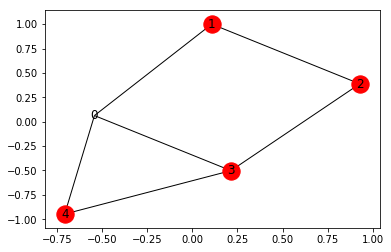

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
def tological(arr):
    res = np.zeros(arr.shape)
    for i in range(arr.shape[0]):
        for j in range(arr.shape[0]):
            if arr[i,j]:
                res[i,j]=1
    return res

Gr = nx.from_numpy_array(tological(grid2.admat_with_earth))
nx.draw_networkx(Gr, nodelist=(range(1,5)))